# Лабораторная работа№ 1
## Выполнил Гневнов Артем Евгеньевич, ИВТ 2.1

### Задание 1.1

In [1]:
import pandas as pd

# MarketingSpend.csv

print("MarketingSpend.csv ")

data = pd.read_csv('MarketingSpend.csv', header=0, names=['Date', 'Offline', 'Online'])

# Анализ колонки 'Online'
print("\n[Online-траты]")
print(f"• Минимальное значение: {data['Online'].min():.1f}")
print(f"• Максимальное значение: {data['Online'].max():.1f}")
print(f"• Среднее значение: {data['Online'].mean():.3f}")
print(f"• Стандартное отклонение: {data['Online'].std():.3f}")
print(f"• Дисперсия: {data['Online'].var():.3f}")

# Анализ колонки 'Offline'
print("\n[Offline-траты]")
print(f"• Минимальное значение: {data['Offline'].min():.1f}")
print(f"• Максимальное значение: {data['Offline'].max():.1f}")
print(f"• Среднее значение: {data['Offline'].mean():.3f}")
print(f"• Стандартное отклонение: {data['Offline'].std():.3f}")
print(f"• Дисперсия: {data['Offline'].var():.3f}")

# describe MarketingSpend.csv
print("\n" + "-" * 80)
print("describe (MarketingSpend.csv):")
print(data.describe())


# info MarketingSpend.csv
print("\n" + "-" * 80)
print("info (MarketingSpend.csv):")
print(data.info())



# Анализ данных из Retail.csv
print("\n" " Retail.csv ")

# Загрузка данных
data1 = pd.read_csv('Retail.csv')

# 1. Количество инвойсов
num_invoices = data1['InvoiceNo'].nunique()
print(f"\n1. Количество инвойсов: {num_invoices}")

# 2. Количество товаров (StockCode)
num_stockcodes = data1['StockCode'].nunique()
print(f"\n2. Количество уникальных товаров: {num_stockcodes}")

# 3. Топ-10 товаров по количеству заказов
top_10_stockcodes = data1['StockCode'].value_counts().head(10)
print("\n3. Топ-10 товаров (StockCode) по количеству заказов:")
print(top_10_stockcodes.to_string())  # to_string() для красивого вывода

# describe Retail.csv
print("\n" + "-" * 80)
print("describe (Retail.csv):")
print(data1.describe())

MarketingSpend.csv 

[Online-траты]
• Минимальное значение: 320.2
• Максимальное значение: 4556.9
• Среднее значение: 1905.881
• Стандартное отклонение: 808.857
• Дисперсия: 654249.409

[Offline-траты]
• Минимальное значение: 500.0
• Максимальное значение: 5000.0
• Среднее значение: 2843.562
• Стандартное отклонение: 952.292
• Дисперсия: 906860.906

--------------------------------------------------------------------------------
describe (MarketingSpend.csv):
           Offline       Online
count   365.000000   365.000000
mean   2843.561644  1905.880740
std     952.292448   808.856853
min     500.000000   320.250000
25%    2500.000000  1258.600000
50%    3000.000000  1881.940000
75%    3500.000000  2435.120000
max    5000.000000  4556.930000

--------------------------------------------------------------------------------
info (MarketingSpend.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype

### Задание 1.2

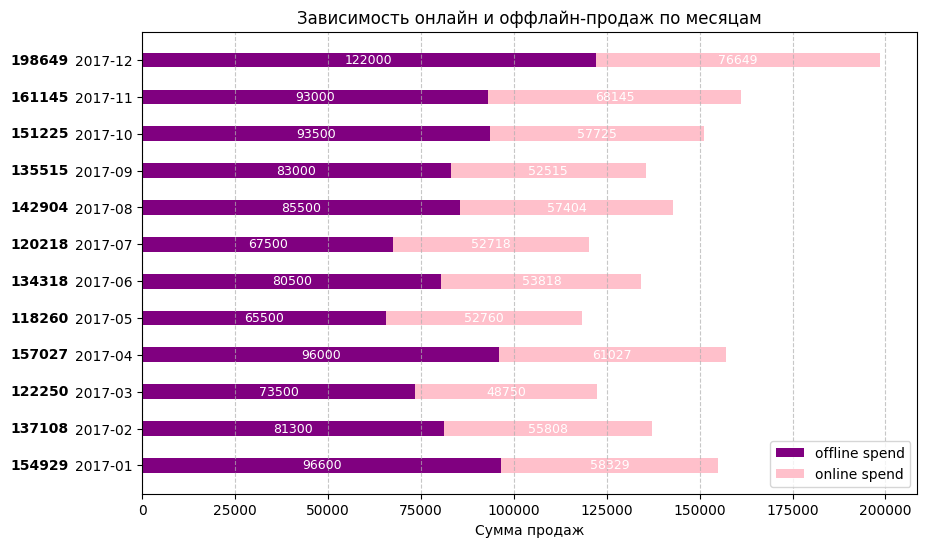

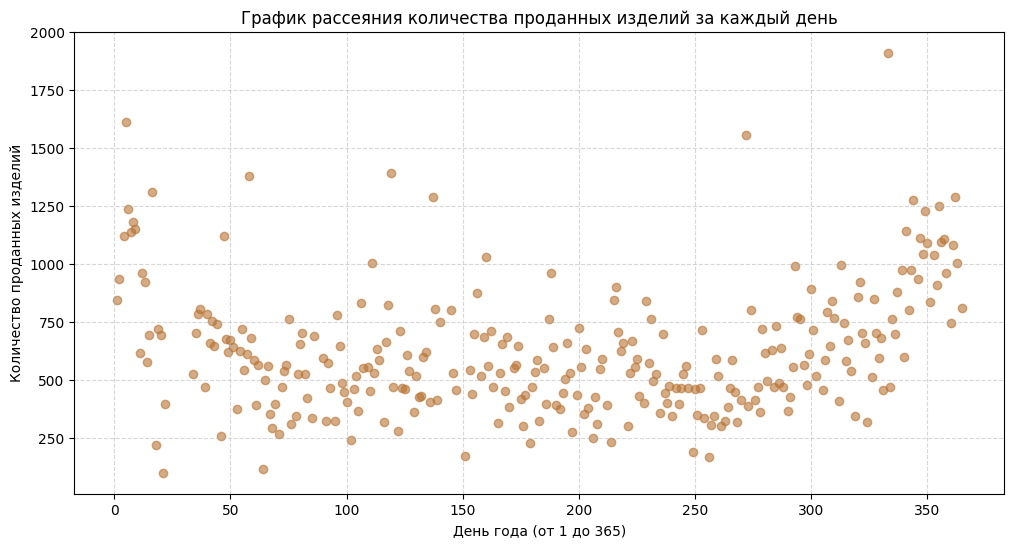

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('MarketingSpend.csv', header=0, names=['Date', 'Offline', 'Online'], parse_dates=['Date'])
data1 = pd.read_csv('Retail.csv', parse_dates=['InvoiceDate'])
# MarketingSpend.csv

data['Month'] = data['Date'].dt.strftime('%Y-%m')
monthly_sales = data.groupby('Month')[['Offline', 'Online']].sum()

fig, ax = plt.subplots(figsize=(10, 6))
bar_height = 0.4
months = range(len(monthly_sales))

ax.barh(months, monthly_sales['Offline'], height=bar_height, label='offline spend', color='purple')
ax.barh(months, monthly_sales['Online'], height=bar_height, left=monthly_sales['Offline'], label='online spend', color='pink')

for i, (offline, online) in enumerate(zip(monthly_sales['Offline'], monthly_sales['Online'])):
    ax.text(offline / 2, i, f'{offline:.0f}', va='center', ha='center', color='white', fontsize=9)
    ax.text(offline + online / 2, i, f'{online:.0f}', va='center', ha='center', color='white', fontsize=9)
    ax.text(-max(monthly_sales['Offline'] + monthly_sales['Online']) * 0.1, i, f'{offline + online:.0f}', va='center', ha='right', color='black', fontsize=10, fontweight='bold')

ax.set_yticks(months)
ax.set_yticklabels(monthly_sales.index)
ax.set_xlabel('Сумма продаж')
ax.set_title('Зависимость онлайн и оффлайн-продаж по месяцам')
ax.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Retail.csv

daily_sales = data1.groupby('InvoiceDate')['StockCode'].count().reset_index()
daily_sales['DayOfYear'] = daily_sales['InvoiceDate'].dt.dayofyear

plt.figure(figsize=(12, 6))
plt.scatter(daily_sales['DayOfYear'], daily_sales['StockCode'], color='#B87333', alpha=0.6)
plt.xlabel('День года (от 1 до 365)')
plt.ylabel('Количество проданных изделий')
plt.title('График рассеяния количества проданных изделий за каждый день')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()